# IPL Matches Data Analysis

In [1]:
# While watching the first match itself, the idea of analyzing IPL dataset struck my mind and luckily I found one dataset 
# on Kaggle which contains the data of matches held between 2008-2010

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

# LOADING THE DATASET

In [4]:
ipl_df = pd.read_csv('IPL Matches 2008-2020.csv')

In [5]:
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# DATA PREPARATION AND CLEANING

In [6]:
ipl_df.shape

(816, 17)

In [7]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
ipl_df.isnull().values.any()

True

In [9]:
ipl_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
# Since method column has too many null values i will remove the column and remove all the null values
# from other columns and i will also remove umpire columns as it is of no use in this EDA


In [11]:
ipl_df = ipl_df.drop(['umpire1','umpire2','method'],axis=1)
ipl_df = ipl_df.drop('result_margin',axis=1)
ipl_df.result.fillna('no result',inplace=True)
ipl_df['winner'].fillna('no winner',inplace=True)
ipl_df.eliminator.fillna('no elimination',inplace=True)
ipl_df.city.fillna('Unknown',inplace=True)
ipl_df.player_of_match.fillna('NA',inplace=True)

In [12]:
ipl_df.isnull().any()

id                 False
city               False
date               False
player_of_match    False
venue              False
neutral_venue      False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner             False
result             False
eliminator         False
dtype: bool

In [13]:
ipl_df['Year'] = pd.DatetimeIndex(ipl_df.date).year

# EXPLORATORY ANALYSIS & VISUALISATION

In [14]:
ipl_df.sample(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,Year
659,1136584,Bengaluru,2018-04-25,MS Dhoni,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,N,2018
356,598032,Jaipur,2013-04-27,JP Faulkner,Sawai Mansingh Stadium,0,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Rajasthan Royals,wickets,N,2013
408,729299,Unknown,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,N,2014
474,829737,Bangalore,2015-04-19,Harbhajan Singh,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Mumbai Indians,runs,N,2015
156,419147,Nagpur,2010-04-10,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",0,Deccan Chargers,Chennai Super Kings,Chennai Super Kings,bat,Deccan Chargers,wickets,N,2010


# Number of Matches Hosted in Different Cities 

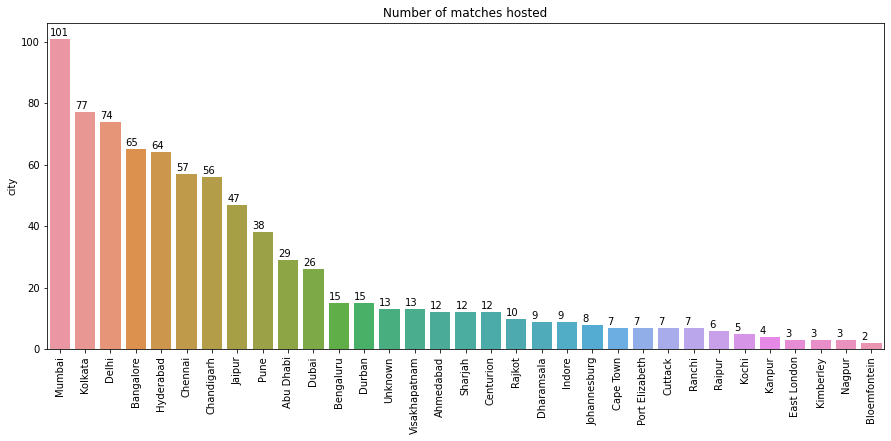

In [15]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')

host_city = ipl_df.city.value_counts()
cities = pd.DataFrame(host_city)
count=0
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1

sns.barplot(host_city.index,host_city);

# MATCHES PLAYED VS MATCHES WON

In [16]:
matches_df = pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_df = matches_df.value_counts().reset_index()
matches_df.columns = ["Team","Total_Matches"]
matches_df['Wins'] = ipl_df['winner'].value_counts().reset_index()['winner']
matches_df

,Team,Total_Matches,Wins
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,106
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,91
4,Chennai Super Kings,178,88
5,Delhi Daredevils,161,81
6,Rajasthan Royals,161,67
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,19


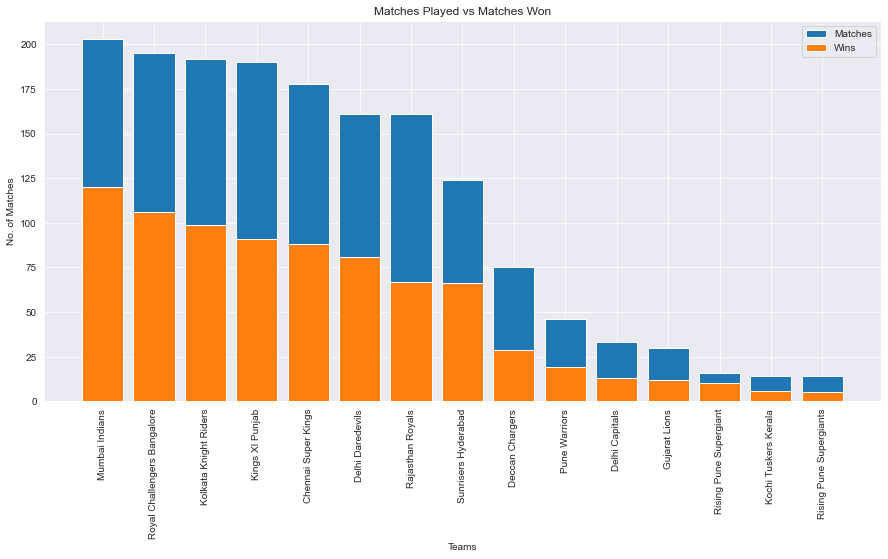

In [30]:
plt.figure(figsize=(15,7))
temp1 = plt.bar(matches_df.Team,matches_df.Total_Matches)
temp2 = plt.bar(matches_df.Team,matches_df.Wins)
plt.xticks(rotation=90)
plt.title("Matches Played vs Matches Won")
plt.ylabel("No. of Matches")
plt.xlabel("Teams")
plt.legend(['Matches','Wins'])
plt.show()

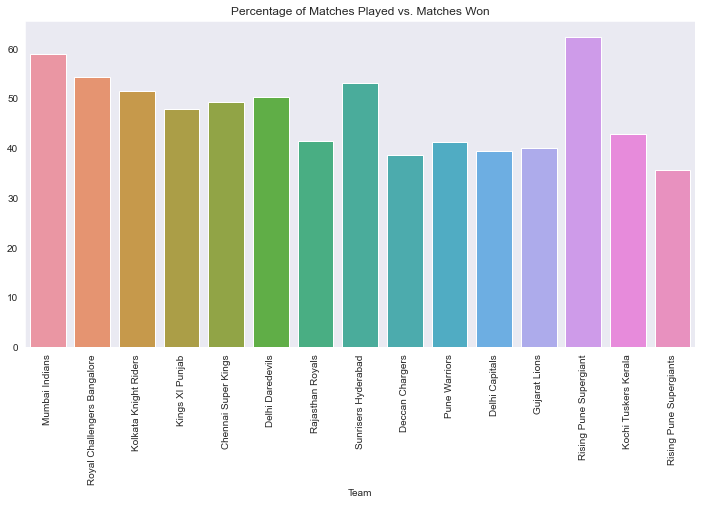

In [32]:

win_percentage = round(matches_df['Wins']/matches_df['Total_Matches'],3)*100 

plt.figure(figsize=(12,6))
temp = sns.barplot(matches_df.Team,win_percentage)
plt.xticks(rotation=90)
plt.title('Percentage of Matches Played vs. Matches Won')
sns.set_style('dark')


# Most No. of Man of the Match Title won by Player

In [19]:
m_o_m = ipl_df.player_of_match.value_counts()
m_o_m[:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: player_of_match, dtype: int64

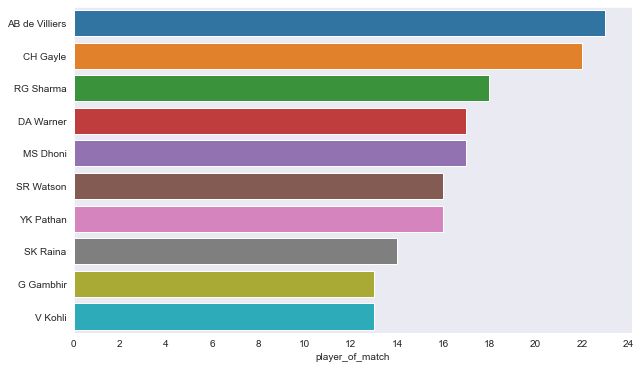

In [20]:
plt.figure(figsize=(10,6))
plt.xticks(range(0,28,2))
temp = sns.barplot(y=m_o_m.index[:10],x=m_o_m[:10])
plt.show()

# Does winning the toss increase the chances of winning the match?

In [21]:
win_df = ipl_df.winner==ipl_df.toss_winner
win_df

0      False
1       True
2      False
3      False
4      False
       ...  
811    False
812    False
813     True
814     True
815    False
Length: 816, dtype: bool

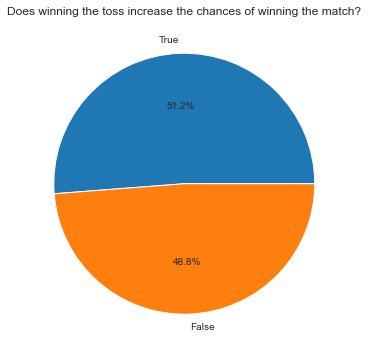

In [22]:
plt.figure(figsize=(12,6))
plt.title("Does winning the toss increase the chances of winning the match?")
plt.pie(win_df.value_counts(),labels=win_df.value_counts().index, autopct='%.1f%%');

# Highest Number of Matches Won  

In [23]:
ipl_df.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
no winner                        4
Name: winner, dtype: int64

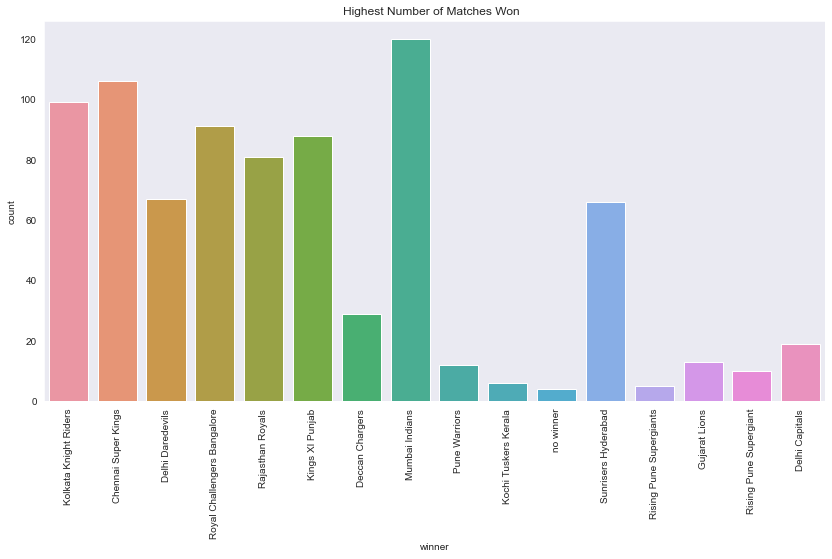

In [24]:
plt.figure(figsize=(14,7))
plt.title("Highest Number of Matches Won  ")
plt.xticks(rotation=90)
sns.countplot(ipl_df.winner);

# Number Matches Hosted in Each Stadium

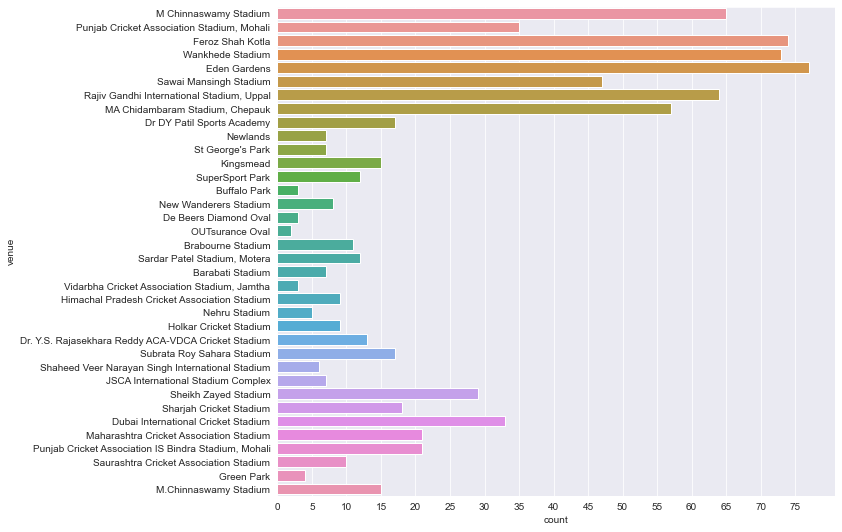

In [25]:
plt.figure(figsize=(10,9))
sns.set_style('darkgrid')
plt.xticks(range(0,80,5))
temp = sns.countplot(y=ipl_df.venue)
plt.show()

# Toss Decisions in Each Season

In [26]:
year_df = ipl_df[['toss_decision','Year']]
year_df = year_df.set_index('toss_decision')

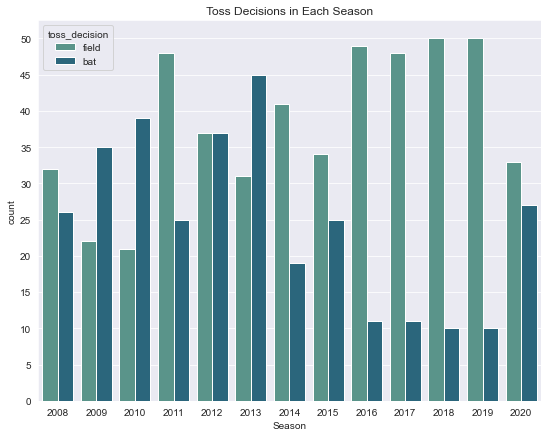

In [27]:
plt.figure(figsize=(9,7))
plt.title(" Toss Decisions in Each Season ")

plt.yticks(range(0,51,5))
temp = sns.countplot(year_df.Year, hue=year_df.index, palette='crest')
temp.set_xlabel("Season")
plt.show()